# PyCalcolAr
### Inizializzazione

In [77]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.set_option('display.max_columns', None)
from copy import deepcopy

# Variabile utilizzata nel calcolo, DA MODIFICARE MANUALMENTE DALL'UTENTE  
delay = 246

### Importazione files
### > file Triplo36 (file di calibrazione dell'aria)

In [78]:
# definire il percorso del file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
file_path = "../test_data/Triplo36.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', \
               'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', \
               '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', \
               'err 38IC0/36IC0', 'Run', 'Path']

# definire le colonne che contengono dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', \
                 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', \
                 '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', \
                 'err 38IC0/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
                                   '36F', 'err 36F', '40F/36F', 'err 40F/36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con il numero del run 
run_number = airpipette_data['Path'].str.split('.').str[0]
run_number = run_number.str.split('_').str[-1]
run_number.name= 'Run_Number'
run_number = pd.to_numeric(run_number)

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, run_number, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)

# conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)
airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000

display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,40F/36F,err 40F/36F,Path
0,Sample Name,3045,2015-10-06 10:33:00,0.73900,0.00400,0.000799,9.292638e-07,0.001154,0.000004,0.004150,0.000003,0.002307,0.000021,321.000,3.30,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,3046,2015-10-06 10:52:00,1.22000,0.00041,0.000796,9.613074e-07,0.001211,0.000003,0.004134,0.000003,0.004021,0.000014,303.000,1.10,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,3047,2015-10-06 11:23:00,1.22000,0.00051,0.000798,8.171113e-07,0.001230,0.000003,0.004150,0.000002,0.004021,0.000015,304.000,1.10,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,3054,2015-10-08 10:13:00,0.75800,0.00400,0.000796,8.811984e-07,0.001067,0.000004,0.004134,0.000002,0.002307,0.000018,329.000,3.00,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,3055,2015-10-08 10:27:00,1.09000,0.00036,0.000694,1.009373e-06,0.000974,0.000003,0.003589,0.000002,0.003525,0.000022,309.000,1.90,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,9737,2020-06-23 11:02:00,1.65538,0.00053,0.000886,1.265721e-06,0.004927,0.000004,0.004775,0.000004,0.005568,0.000018,297.314,0.95,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,9752,2020-06-24 09:25:00,1.65331,0.00043,0.000884,1.441961e-06,0.004896,0.000004,0.004765,0.000005,0.005594,0.000021,295.557,1.10,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,9753,2020-06-24 09:50:00,1.65039,0.00049,0.000891,1.313787e-06,0.004914,0.000003,0.004798,0.000004,0.005575,0.000021,296.018,1.10,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,9754,2020-06-24 10:08:00,1.64847,0.00056,0.000891,1.009373e-06,0.004916,0.000004,0.004792,0.000004,0.005553,0.000022,296.854,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### > file Run4 e Run22 (file di misura)

In [79]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F', \
                     '36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', \
                     '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', \
                     'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F', \
                      '36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', \
                      'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', \
                      'Run', 'Path']

# definire il percorso dei file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, \
                        sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, \
                         sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

# definire le colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F', \
                     '36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', \
                     '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', \
                     'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']  
 
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F', \
                      '36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', \
                      'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

df_data = pd.concat([df_data_4, df_data_22], axis=0)

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con il numero del run 
run_number = df_data['Path'].str.split('.').str[0]
run_number = run_number.str.split('_').str[-1]
run_number.name= 'Run_Number'
run_number = pd.to_numeric(run_number)

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, run_number, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Run_Number,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2755,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,0.002610,1.300000e-06,0.000097,0.000016,0.000021,7.700000e-08,0.000013,6.000000e-08,2.460000e-04,1.600000e-06,-5.380000e-09,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2756,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,0.006510,2.500000e-06,0.002540,0.000011,0.000023,8.300000e-08,0.000014,7.100000e-08,9.520000e-04,4.800000e-06,6.160000e-08,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2758,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,0.003050,1.400000e-06,0.002350,0.000012,0.000013,6.900000e-08,0.000014,7.500000e-08,5.420000e-04,2.400000e-06,9.320000e-09,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2762,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,0.000259,2.900000e-07,0.000094,0.000012,0.000010,5.500000e-08,0.000012,5.900000e-08,4.350000e-05,2.800000e-07,4.380000e-06,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2763,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,0.001700,8.900000e-07,0.000375,0.000012,0.000098,1.600000e-07,0.000013,6.400000e-08,7.700000e-09,7.600000e-09,-3.530000e-09,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,9744,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,0.000881,8.000000e-07,0.037940,0.000022,0.000009,9.300000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,9745,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,0.000268,4.100000e-07,0.040472,0.000021,0.000008,7.600000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,9748,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,0.000749,6.800000e-07,0.051242,0.000025,0.000012,9.200000e-08,0.000018,1.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,9749,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,0.000581,6.800000e-07,0.121323,0.000043,0.000010,7.800000e-08,0.000019,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare i dati per data e ora (Date_time) per selezionare un solo campione
#### DA MODIFICARE MANUALMENTE DALL'UTENTE
#### Verificare correttezza della selezione nel dataframe visualizzato !

In [80]:
# lasciare questo filtro data commentato (opzione filtro data)

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

In [81]:
# filtrare il dataframe per data (DA MODIFICARE MANUALMENTE DALL'UTENTE)
filter_data_min = pd.Timestamp(year=2020, month=6, day=24, hour=8)
filter_data_max = pd.Timestamp(year=2020, month=6, day=24, hour=22)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

print("\n   > df_data:")
display(df_data)


# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = deepcopy(airpipette_data_filtered)
print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Name,Run_Number,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,TOM SM ST1,9755,2020-06-24 11:19:00,0.143381,0.000050,0.000129,2.500000e-07,0.000410,4.800000e-07,0.000205,0.000018,0.000394,4.700000e-07,0.000195,0.000018,0.000006,6.100000e-08,0.000015,8.400000e-08,0.000134,3.900000e-07,0.000006,5.600000e-08,1.45045,0.1300,0.960810,0.00160,349.708,0.43,363.972,0.45,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,9756,2020-06-24 11:47:00,0.646386,0.000210,0.000391,4.200000e-07,0.001882,1.300000e-06,0.000501,0.000016,0.001827,1.100000e-06,0.000303,0.000016,0.000007,7.200000e-08,0.000017,8.100000e-08,0.000236,6.600000e-07,0.000007,6.800000e-08,1.28278,0.0660,0.970343,0.00088,343.386,0.26,353.881,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
2,TOM SM ST3,9757,2020-06-24 12:08:00,0.113456,0.000036,0.000180,2.900000e-07,0.000300,4.200000e-07,0.000225,0.000017,0.000291,3.600000e-07,0.000922,0.000018,0.000006,5.300000e-08,0.000017,1.000000e-07,0.000758,6.600000e-07,0.000006,6.100000e-08,1.21714,0.0230,0.971918,0.00180,378.730,0.55,389.672,0.50,Raw data stored in - C:\Nu Noble\Results\Data...
3,TOM SM ST4,9758,2020-06-24 12:29:00,0.140526,0.000047,0.000288,4.000000e-07,0.000351,4.000000e-07,0.000363,0.000017,0.000345,4.300000e-07,0.001700,0.000017,0.000006,5.500000e-08,0.000017,1.100000e-07,0.001404,1.000000e-06,0.000006,6.500000e-08,1.21116,0.0120,0.982168,0.00170,400.302,0.47,407.569,0.53,Raw data stored in - C:\Nu Noble\Results\Data...
4,TOM SM ST5,9759,2020-06-24 12:57:00,0.341902,0.000110,0.000471,4.300000e-07,0.000922,7.800000e-07,0.000567,0.000017,0.000903,6.900000e-07,0.002254,0.000017,0.000006,6.700000e-08,0.000017,9.200000e-08,0.001908,1.300000e-06,0.000007,5.600000e-08,1.18115,0.0089,0.979210,0.00110,370.815,0.33,378.688,0.31,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,40F/36F,err 40F/36F,Path
832,Sample Name,9754,2020-06-24 10:08:00,1.64847,0.00056,0.000891,0.000001,0.004916,0.000004,0.004792,0.000004,0.005553,0.000022,296.854,1.2,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare i dati per numero di run, per selezionare un solo campione
#### DA MODIFICARE MANUALMENTE DALL'UTENTE
#### Verificare correttezza della selezione nel dataframe visualizzato !

In [82]:
# filtrare il dataframe per numero di run (DA MODIFICARE MANUALMENTE DALL'UTENTE)
#filter_run_number_min = 9745
#filter_run_number_max = 9750

#df_data = df_data[(df_data['Run_Number'] >= filter_run_number_min) & (df_data['Run_Number'] <= filter_run_number_max)]
#df_data.reset_index(drop=True, inplace=True)
#df_data.sort_values('Run_Number', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

#print("\n   > df_data:")
#display(df_data)


# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
#sample_min = min(df_data['Run_Number'].to_list())
#older_calibration_df = airpipette_data[airpipette_data['Run_Number'] < sample_min]
#data_w = max(older_calibration_df['Run_Number'].to_list())

#airpipette_data_filtered = airpipette_data[airpipette_data['Run_Number'] == data_w]
#calibration_data = airpipette_data_filtered 

#print("\n\n   > calibration_data:")
#display(calibration_data)

### Operazioni derivate dal file di calibrazione triplo36 (fogli Excel airpipette_data e sample_data)
#### Per calcolare 1sig_rel (errore relativo) = err_abs / _Ar  (err_abs corrisponde all'errore che misura lo spettrometro)
#### 1sig_abs = errore assoluto, 1sig_rel = errore relativo

In [83]:
# calcolare sig_rel 36_IC0

value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

print ('1sig_rel_36IC0', sig_rel_36IC0)


# calcolare sig_rel 36_IC1

value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

print ('1sig_rel_36IC1', sig_rel_36IC1)


# calcolare sig_rel 36_F

value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)

print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36IC0 0.0007690610099442931
1sig_rel_36IC1 0.0008473250599645426
1sig_rel_36F 0.00403926162297532


In [84]:
# calcolare sig_rel 40F/36F

value_err40F_36F = float(calibration_data['err 40F/36F'].values)
value_40F_36F = float(calibration_data['40F/36F'].values)
sig_rel_40F_36F = float(value_err40F_36F / value_40F_36F)

print ('1sig_rel_40F/36F', sig_rel_40F_36F)

1sig_rel_40F/36F 0.004042391209146583


In [85]:
# calcolare GAIN_F/IC0

value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)

print ('gain F/IC0', gain_F_IC0)

# calcolare sig_abs GAIN_F/IC0 

sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/ICO', sig_abs_F_ICO)

gain F/IC0 1.1589348170637919
sig_abs_F/ICO 0.004765334964903748


In [86]:
# calcolare GAIN_F/IC1 

value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)

print ('gain F/IC1: ', gain_F_IC1)

# calcolare sig_abs GAIN_F/IC1

sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/IC1', sig_abs_F_IC1)

gain F/IC1:  1.129542965898425
sig_abs_F/IC1 0.004661824327765827


In [87]:
# calcolare 36IC0 correzione gain

corr_gain_36IC0 = value_36IC0 * gain_F_IC0

print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  0.005553120243531203


In [88]:
# calcolare 40/36 correzione

value_40F = float(calibration_data['40F'].values)

corr_40_36 = (value_40F) / corr_gain_36IC0

print ('corr_40_36: ', corr_40_36)

# calcolare sig_abs 40/36 correzione

sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / \
                                                        calibration_data['40F'].values, 2))**(1/2)

print ('sig_abs_40/36', sig_abs_40_36)

corr_40_36:  296.854728099989
sig_abs_40/36 [1.20330703]


In [89]:
# calcolare source frax 

source_frax = float(corr_40_36 / 298.56)

print ('source_frax: ', source_frax)

# calcolare sig_abs source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print ('sig_abs_source_frax', sig_abs_source_frax)

source_frax:  0.9942883443863512
sig_abs_source_frax [0.00403037]


#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (DA MODIFICARE MANUALMENTE DALL'UTENTE, valori misurati 4/5 di volte l'anno)

In [90]:
update_data = pd.Timestamp(year=2020, month=6, day=24)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0040655291, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2020-06-24 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.00406553,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (NON SONO DA MODIFICARE, valori costanti)

In [91]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, 0],
                               '(36Ar/37Ar) Ca': [0.000255, 0.015],
                               '(38Ar/37Ar) Ca': [0.00027, 0.015],
                               '(39Ar/37Ar) Ca': [0.00067, 0.015],
                               'Lambda Ar37 [1/d]': [0.019748, 0],
                               'Lambda Ar40 [1/Ma]': [0.0005543, 0],
                               'Interference 40K': [0.033, 0.01],
                               'Coefficient 39Ar for J': [143, 0],
                               'Coefficient Ca/K': [1.94, 0],
                               'Coefficient Cl/K': [0.178, 0]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,0.000
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,0.000
Lambda Ar40 [1/Ma],0.000554,0.000
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,0.000
Coefficient Ca/K,1.940000,0.000
Coefficient Cl/K,0.178000,0.000


### Tabella: IRRADIATIONS
#### (DA MODIFICARE MANUALMENTE DALL'UTENTE)

In [92]:
# sample_weight, DA MODIFICARE MANUALMENTE DALL'UTENTE (cambia per ogni campione) 
sample_weight = 0.00034

# J_factor e J_factor_errors, DA MODIFICARE MANUALMENTE DALL'UTENTE (cambia per ogni campione) 
J_factor = 0.0011422
J_factor_errors = 0.0002

# sensitivity, DA MODIFICARE MANUALMENTE DALL'UTENTE (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice

# i gain_F_IC0 e gain_F_IC1 sono già stati calcolati precedentemente 
# in base al collettore che si vuole utilizzare, questo dato dovrà MODIFICATO MANUALMENTE DALL'UTENTE
gain_F_IC0 = gain_F_IC0  

gain_rel_uncertainty_errors = sig_rel_40F_36F
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']

pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, 0],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, 0],
                     'Gain F/IC0': [gain_F_IC0, 0],
                     'Gain rel uncertainty': [gain_rel_uncertainty, gain_rel_uncertainty_errors],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], 0],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], 0],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], 0]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.400000e-04,0.000000
J factor,1.142200e-03,0.000200
Sensitivity (mL/mV),3.370000e-11,0.000000
Gain F/IC0,1.158935e+00,0.000000
Gain rel uncertainty,3.488023e-03,0.004042
Measured 40Ar/36Ar pipettes,3.353102e+02,0.000000
Gain corrected 40Ar/36Ar pipettes,2.893262e+02,0.969072
Pipette rel uncertainty,4.030369e-03,0.000000
Total fractionation uncertainty,4.030369e-03,0.000000


### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simili a quelle del file Excel CalcolAr

In [93]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (DA MODIFICARE MANUALMENTE DALL'UTENTE)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246


### Input = online Regression

PLOT 'gainF/IC0 vs 40Ar F' and 'gainIC0/IC1 vs gainF/IC0'



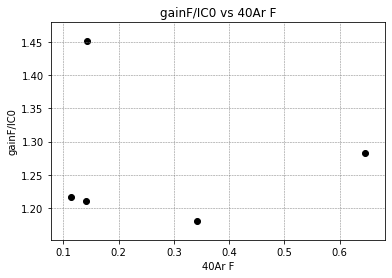

In [94]:
# Crea 'gainF/IC0 vs 40Ar F'
plt.scatter(df_data['40Ar F'],df_data['gainF/IC0'],marker= 'o', color = 'black' )
plt.title('gainF/IC0 vs 40Ar F')
plt.xlabel('40Ar F')
plt.ylabel('gainF/IC0')
plt.grid(color='grey', linestyle='--', linewidth=0.5)


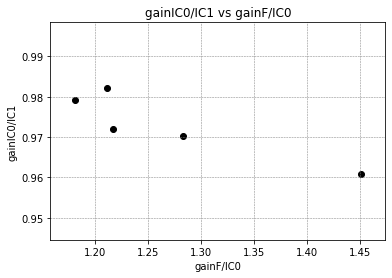

In [95]:
# Crea 'gainIC0/IC1 vs gainF/IC0'
plt.scatter(df_data['gainF/IC0'],df_data['gainIC0/IC1'],marker= 'o', color = 'black' )
plt.title('gainIC0/IC1 vs gainF/IC0')
plt.xlabel('gainF/IC0')
plt.ylabel('gainIC0/IC1')
plt.grid(color='grey', linestyle='--', linewidth=0.5)


In [96]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

count_row = df_data.shape[0]
for i in range (count_row):
    if pd.isna(df_data.loc[i, '39Ar IC0']) or (df_data.loc[i, '39Ar F'])>= 0.001:
        input_data_df.loc[i, '39Ar'] = df_data.loc[i, '39Ar F'] * 1000
        input_data_df.loc[i, 'err39Ar'] = df_data.loc[i, 'err39Ar F']* 1000
    else:
        input_data_df.loc[i, '39Ar'] = df_data.loc[i, '39Ar IC0'] * gain_F_IC0 * 1000
        input_data_df.loc[i, 'err39Ar'] = df_data.loc[i, 'err39Ar IC0']* gain_F_IC0 * 1000
        
input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * gain_F_IC0 * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar IC0'].values * gain_F_IC0 * 1000

for i in range (count_row):
    if pd.isna(df_data.loc[i, '37Ar IC1']) or (df_data.loc[i, '37Ar IC1'])<= 0.001 :
        input_data_df.loc[i, '37Ar'] = df_data.loc[i, '37Ar IC0'] * gain_F_IC0 * 1000
        input_data_df.loc[i, 'err37Ar'] = df_data.loc[i, 'err37Ar IC0'] * gain_F_IC0 * 1000
    else:
        input_data_df.loc[i, '37Ar'] = df_data.loc[i, '37Ar IC1'] * df_data.loc[i, 'gainIC0/IC1'] * 1000
        input_data_df.loc[i, 'err37Ar'] = df_data.loc[i, 'err37Ar IC1']* df_data.loc[i, 'gainIC0/IC1']  * 1000
        print("wanrning verificare il gain: ", df_data.loc[i, 'gainIC0/IC1'])

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC1'].values * gain_F_IC1 * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC1'].values * gain_F_IC1 * 1000

input_data_df

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452
4,1,246,341.902,0.110,2.253630,0.017000,0.545465,0.000498,0.007290,0.000078,1.041470,0.000881


### Measured values corrected for mass spectrometer background

In [97]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - \
                               (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values


results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values


results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values


results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values


results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

results_data

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542,143.373857,0.050000,0.000349,0.152844,0.000542,0.003549,0.148163,0.000307,0.002069,0.002649,0.000816,0.308119,0.462616,0.000544,0.001177
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468,646.374971,0.210000,0.000325,0.270605,0.000822,0.003036,0.451817,0.000497,0.001100,0.003898,0.000817,0.209668,2.125740,0.001469,0.000691
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474,113.425017,0.036001,0.000317,0.875265,0.000822,0.000939,0.207054,0.000351,0.001694,0.002730,0.000815,0.298678,0.337877,0.000477,0.001412
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003076,0.000816,0.265114,0.396026,0.000455,0.001148
4,1,246,341.902,0.110,2.253630,0.017000,0.545465,0.000498,0.007290,0.000078,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003225,0.000817,0.253282,1.040970,0.000882,0.000848


### 37Ar decay

In [100]:
results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542,143.373857,0.050000,0.000349,0.152844,0.000542,0.003549,0.148163,0.000307,0.002069,0.002649,0.000816,0.308119,0.462616,0.000544,0.001177,130.043076
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468,646.374971,0.210000,0.000325,0.270605,0.000822,0.003036,0.451817,0.000497,0.001100,0.003898,0.000817,0.209668,2.125740,0.001469,0.000691,130.043076
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474,113.425017,0.036001,0.000317,0.875265,0.000822,0.000939,0.207054,0.000351,0.001694,0.002730,0.000815,0.298678,0.337877,0.000477,0.001412,130.043076
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003076,0.000816,0.265114,0.396026,0.000455,0.001148,130.043076
4,1,246,341.902,0.110,2.253630,0.017000,0.545465,0.000498,0.007290,0.000078,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003225,0.000817,0.253282,1.040970,0.000882,0.000848,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [40]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542,143.373857,0.050000,0.000349,0.152844,0.000542,0.003549,0.148163,0.000307,0.002069,0.002649,0.000816,0.308119,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.151662,0.003690,0.328654,0.308134
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468,646.374971,0.210000,0.000325,0.270605,0.000822,0.003036,0.451817,0.000497,0.001100,0.003898,0.000817,0.209668,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.268512,0.003199,0.483688,0.209689
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474,113.425017,0.036001,0.000317,0.875265,0.000822,0.000939,0.207054,0.000351,0.001694,0.002730,0.000815,0.298678,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.868498,0.001377,0.338731,0.298693
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003076,0.000816,0.265114,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.381698,0.265131
4,1,246,341.902,0.110,2.253630,0.017000,0.545465,0.000498,0.007290,0.000078,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003225,0.000817,0.253282,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.400118,0.253300


### Bg + Fract + Decay Corrected 

In [41]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)


results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)


results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)


results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])
results_data.loc[:,'1sigRel37corr'] = (pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                       pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2) * 9/ 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542,143.373857,0.050000,0.000349,0.152844,0.000542,0.003549,0.148163,0.000307,0.002069,0.002649,0.000816,0.308119,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.151662,0.003690,0.328654,0.308134
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468,646.374971,0.210000,0.000325,0.270605,0.000822,0.003036,0.451817,0.000497,0.001100,0.003898,0.000817,0.209668,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.268512,0.003199,0.483688,0.209689
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474,113.425017,0.036001,0.000317,0.875265,0.000822,0.000939,0.207054,0.000351,0.001694,0.002730,0.000815,0.298678,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.868498,0.001377,0.338731,0.298693
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003076,0.000816,0.265114,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.381698,0.265131
4,1,246,341.902,0.110,2.253630,0.017000,0.545465,0.000498,0.007290,0.000078,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003225,0.000817,0.253282,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.400118,0.253300


### Interference Corrected

In [42]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values


results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)


results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values


results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values


results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values


results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)


results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'error magnif'] = (1 /results_data.loc[:,'rendimento rad'].values - 1)
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values


results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']


results_data.loc[:,'Ar38Cl'] = results_data.loc[:,'Ar38tot'].values - \
                               results_data.loc[:,'Ar39K'].values / 90 - \
                               results_data.loc[:,'Ar36Atm'].values * 0.18855 - \
                               results_data.loc[:,'Ar37day0'].values * 0.00027
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                          results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542,143.373857,0.050000,0.000349,0.152844,0.000542,0.003549,0.148163,0.000307,0.002069,0.002649,0.000816,0.308119,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.151662,0.003690,0.328654,0.308134,0.000220,0.308499,0.000068,0.151442,0.000564,0.000084,0.308499,0.000026,0.448224,0.001882,0.004200,133.821895,0.562037,9.551962,0.564256,0.066623,14.009885,0.058840,0.059072,0.059588,0.002910,0.048833
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468,646.374971,0.210000,0.000325,0.270605,0.000822,0.003036,0.451817,0.000497,0.001100,0.003898,0.000817,0.209668,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.268512,0.003199,0.483688,0.209689,0.000324,0.210225,0.000068,0.268188,0.000862,0.000123,0.210225,0.000026,2.059872,0.008424,0.004089,614.995496,2.515005,31.379475,2.523757,0.048547,19.598654,0.080148,0.080427,0.053330,0.002792,0.052349
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474,113.425017,0.036001,0.000317,0.875265,0.000822,0.000939,0.207054,0.000351,0.001694,0.002730,0.000815,0.298678,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.868498,0.001377,0.338731,0.298693,0.000227,0.299070,0.000068,0.868271,0.001198,0.000086,0.299070,0.000026,0.327341,0.001399,0.004272,97.730923,0.417542,15.694094,0.419091,0.138365,6.227242,0.026605,0.026704,0.132393,0.002646,0.019983
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003076,0.000816,0.265114,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.381698,0.265131,0.000256,0.265555,0.000068,1.683593,0.016956,0.000097,0.265555,0.000026,0.383680,0.001608,0.004192,114.551642,0.480228,25.916259,0.482522,0.184500,4.420069,0.018530,0.018619,0.236945,0.002494,0.010524
4,1,246,341.902,0.110,2.253630,0.017000,0.545465,0.000498,0.007290,0.000078,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003225,0.000817,0.253282,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.400118,0.253300,0.000268,0.253744,0.000068,2.232960,0.017021,0.000102,0.253744,0.000026,1.008673,0.004155,0.004119,301.149469,1.240451,40.676161,1.245319,0.118997,7.403586,0.030496,0.030615,0.320942,0.002364,0.007365


### RESULTS

In [45]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values


results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values


results_data.loc[:,'39_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values


# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)
total_mL_39Ar = results_data.loc[:,'39_Ar'].sum()
print ('total_mL_39Ar', total_mL_39Ar)

results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39_Ar'].values / total_mL_39Ar) 


results_data.loc[:,'38_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38_Ar'].values * results_data.loc[:,'1sigRel38tot'].values


results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values


results_data.loc[:,'37_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37_Ar'].values


results_data.loc[:,'36_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36_Ar'].values


results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:,'Ar40*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values)) / \
                            irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value']
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                      (pow(irradiations_df.loc['J factor', 'relative error'], 2)+ \
                                       pow(results_data.loc[:,'1sigRel40*'].values, 2) + \
                                       pow(results_data.loc[:,'1sigAbs39K'].values / \
                                           results_data.loc[:,'Ar39K'].values, 2))**(1/2)
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  


results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values) 
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)


results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * \
                            (results_data.loc[:,'38Ar_Cl'].values / results_data.loc[:,'39_Ar'].values)
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)


results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)


results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - \
                              (results_data.loc[:,'Ar37day0'].values * \
                               irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                               results_data.loc[:,'40Ar BC'].values
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

total_mL_39Ar 1.7543377069693598e-10


,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,143.381,0.050,0.155844,0.000452,0.149163,0.000290,0.006714,0.000071,0.463116,0.000542,143.373857,0.050000,0.000349,0.152844,0.000542,0.003549,0.148163,0.000307,0.002069,0.002649,0.000816,0.308119,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.151662,0.003690,0.328654,0.308134,0.000220,0.308499,0.000068,0.151442,0.000564,0.000084,0.308499,0.000026,0.448224,0.001882,0.004200,133.821895,0.562037,9.551962,0.564256,0.066623,14.009885,0.058840,0.059072,0.059588,0.002910,0.048833,4.831699e-09,1.685013e-12,3.219011e-10,1.901544e-11,5.111026e-12,0.000575,2.913365,4.915881e-12,1.419703e-14,2.008105e-12,9.806227e-14,1.107563e-11,3.412779e-12,1.510799e-11,6.343397e-14,125.501572,7.428409,140.358390,110.644754,4.210105,1.297372,0.069936,0.003425,0.001056,0.000004,0.003126,0.000013
1,1,246,646.386,0.210,0.273605,0.000765,0.452817,0.000487,0.007964,0.000083,2.126240,0.001468,646.374971,0.210000,0.000325,0.270605,0.000822,0.003036,0.451817,0.000497,0.001100,0.003898,0.000817,0.209668,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.268512,0.003199,0.483688,0.209689,0.000324,0.210225,0.000068,0.268188,0.000862,0.000123,0.210225,0.000026,2.059872,0.008424,0.004089,614.995496,2.515005,31.379475,2.523757,0.048547,19.598654,0.080148,0.080427,0.053330,0.002792,0.052349,2.178284e-08,7.077003e-12,1.057488e-09,8.505062e-11,9.048871e-12,0.000875,5.157998,1.499077e-11,3.441542e-14,1.797235e-12,9.408365e-14,1.630030e-11,3.417999e-12,6.942186e-11,2.838802e-13,226.297621,18.215014,262.727649,189.867592,3.498867,0.733761,0.035353,0.001854,0.000415,0.000001,0.003187,0.000013
2,1,246,113.456,0.036,0.878265,0.000765,0.208054,0.000336,0.006796,0.000061,0.338377,0.000474,113.425017,0.036001,0.000317,0.875265,0.000822,0.000939,0.207054,0.000351,0.001694,0.002730,0.000815,0.298678,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.868498,0.001377,0.338731,0.298693,0.000227,0.299070,0.000068,0.868271,0.001198,0.000086,0.299070,0.000026,0.327341,0.001399,0.004272,97.730923,0.417542,15.694094,0.419091,0.138365,6.227242,0.026605,0.026704,0.132393,0.002646,0.019983,3.822423e-09,1.213219e-12,5.288910e-10,1.412337e-11,2.926837e-11,0.001209,16.683430,6.869827e-12,1.808345e-14,4.461657e-12,8.915856e-14,1.141522e-11,3.409650e-12,1.103430e-11,4.712206e-14,36.866627,0.985818,38.838262,34.894992,0.756835,0.226064,0.027134,0.000544,0.007655,0.000011,0.002886,0.000012
3,1,246,140.526,0.047,1.699970,0.017000,0.334251,0.000464,0.007142,0.000064,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003076,0.000816,0.265114,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.381698,0.265131,0.000256,0.265555,0.000068,1.683593,0.016956,0.000097,0.265555,0.000026,0.383680,0.001608,0.004192,114.551642,0.480228,25.916259,0.482522,0.184500,4.420069,0.018530,0.018619,0.236945,0.002494,0.010524,4.733768e-09,1.583914e-12,8.733779e-10,1.626100e-11,5.674571e-11,0.017119,32.345947,1.105688e-11,2.

For Spectrum

# FOR SPECTRUM

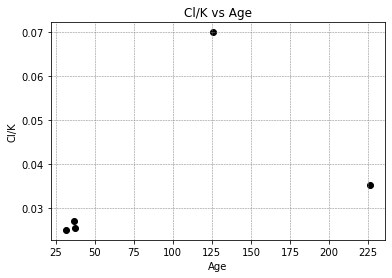

In [116]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')
plt.grid(color='grey', linestyle='--', linewidth=0.5)

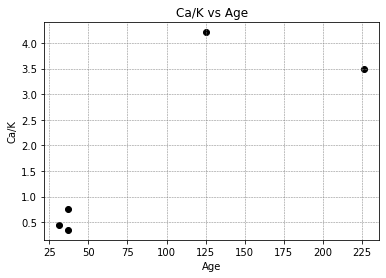

In [117]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')
plt.grid(color='grey', linestyle='--', linewidth=0.5)

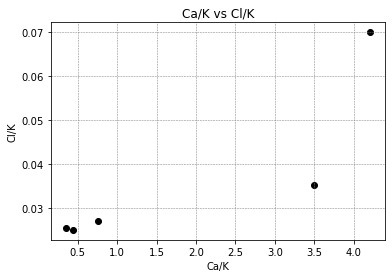

In [118]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')
plt.grid(color='grey', linestyle='--', linewidth=0.5)

Text(0, 0.5, '36Ar/39Ar')

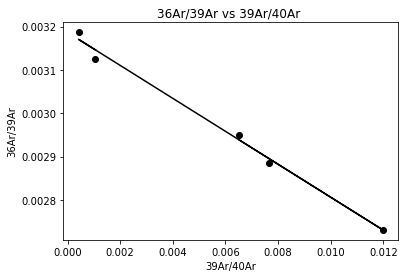

In [119]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [120]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.08390435231252523
y_intercept = 0.003186220290644518
slope = -0.037974434017159796


Crea Spectrum Age plot 

In [121]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()
cumulative_df = pd.DataFrame(cumulative)

# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])

# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])

# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns

# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})

# Cancella l'ultima riga di (Cum%39)
print(double_cumulative_df.index[-1])
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=double_cumulative_df.index[-1]))

# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index

# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns

# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns

# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']

9


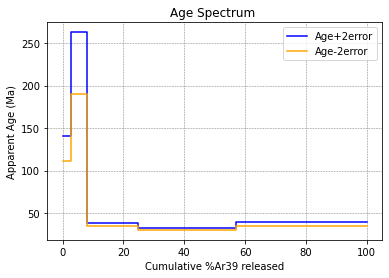

In [150]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error',color = 'blue')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error', color = 'orange')
plt.title('Age Spectrum ')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age (Ma)')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()


